In [1]:
import requests
import pandas as pd
import io
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON
from matplotlib.colors import ListedColormap

df = pd.read_csv("Resources/Florida_COVID19_Case_Line_Data_new.csv")

df.head(3)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 01:04:23+00,2020/07/15 05:00:00+00,90
1,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 19:56:31+00,2020/07/15 05:00:00+00,279
2,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 15:03:33+00,2020/07/15 05:00:00+00,339


In [2]:
#Clean dataframe

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Case1"]]

#Split Date and time into separate columns

new_csv_data_df['Date'] = pd.to_datetime(new_csv_data_df['Case1']).dt.date
new_csv_data_df['Time'] = pd.to_datetime(new_csv_data_df['Case1']).dt.time


#create new dataframe with new date date

new_csv_data_df1 = new_csv_data_df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Date"]]
new_csv_data_df1

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Date
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,2020-07-15
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,2020-07-15
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,2020-07-15
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,NaN,2020-07-15
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,NO,2020-07-15
...,...,...,...,...,...,...,...,...,...
315770,11869,Palm Beach,71.0,65-74 years,Female,Not diagnosed/isolated in FL,Yes,NO,2020-03-04
315771,11740,Gadsden,54.0,45-54 years,Male,Not diagnosed/isolated in FL,Yes,UNKNOWN,2020-03-03
315772,11747,Hillsborough,22.0,15-24 years,Female,Non-FL resident,Yes,NO,2020-03-03
315773,11881,Hillsborough,29.0,25-34 years,Female,FL resident,Yes,NO,2020-03-02


In [3]:
#Create new csv
new_csv_data_df1.to_csv ("new_covid_dataframe.csv")

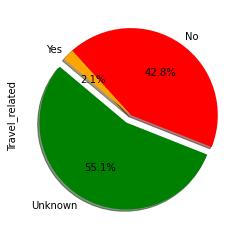

In [4]:
#Compare travel-related cases to non-travel-related cases (Not done yet) (Chika)
travel_vs_nontravel = new_csv_data_df1["Travel_related"].value_counts()
#travel_vs_nontravel

colors = ['green', 'red', 'orange']
explode = (0.1, 0, 0)
travel_vs_nontravel.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.show()


In [5]:
hosp_filter = new_csv_data_df1["Hospitalized"] == "YES"
hosp_filter_df = new_csv_data_df1[hosp_filter]
hosp_filter_df

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Date
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,YES,2020-07-15
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,YES,2020-07-15
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,YES,2020-07-15
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,YES,2020-07-15
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,YES,2020-07-15
...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,YES,2020-03-07
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,YES,2020-03-07
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,YES,2020-03-05
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,YES,2020-03-04


In [6]:
#Total Hospitalized 
hosp_count = hosp_filter_df["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_hospitalized = hosp_filter_df['Age'].mean()
Median_age_hospitalized = hosp_filter_df['Age'].median()

hosp_age_data_df = pd.DataFrame({"Total Number Hospitalized": hosp_count, 
                      "Average Age": [Average_age_hospitalized], "Median Age": [Median_age_hospitalized]})

hosp_age_data_df["Average Age"] = hosp_age_data_df["Average Age"].map("{0:,.3}years".format)
hosp_age_data_df["Median Age"] = hosp_age_data_df["Median Age"].map("{0:,.3}years".format)
hosp_age_data_df

,Total Number Hospitalized,Average Age,Median Age
YES,20154,62.6years,65.0years


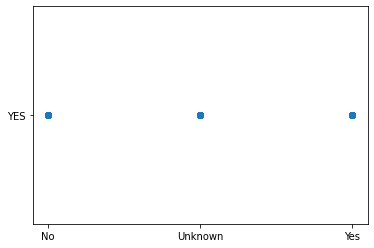

In [20]:
plt.scatter(hosp_filter_df.iloc[:,6],hosp_filter_df.iloc[:,7])
plt.show()


In [8]:
#Calcalate percentage hospitalized by age group 
#Calculate total hospitalized 
Total_hospitalized = hosp_filter_df["Hospitalized"].count()

#Group by age group and count total hospitalized by age category
demo_age_grouped = hosp_filter_df.groupby("Age_group")
total_hospitalize_count = demo_age_grouped["Hospitalized"].value_counts()

#Calculate percentage by age category
age_percentage = (total_hospitalize_count/Total_hospitalized) * 100

#Create a dataframe for values
Age_demographic_summary = pd.DataFrame({"Total Count": total_hospitalize_count, 
                                          "Percentage of hospitalized patients": age_percentage})
#Remove index name
#Age_demographic_summary.index.name =None

#Format percentage to two decimal places 
Age_demographic_summary["Percentage of hospitalized patients"] = Age_demographic_summary["Percentage of hospitalized patients"].map("{0:,.3}%".format)
Age_demographic_summary



,,Total Count,Percentage of hospitalized patients
Age_group,Hospitalized,,
0-4 years,YES,98,0.486%
15-24 years,YES,497,2.47%
25-34 years,YES,1259,6.25%
35-44 years,YES,1876,9.31%
45-54 years,YES,2696,13.4%
5-14 years,YES,74,0.367%
55-64 years,YES,3544,17.6%
65-74 years,YES,3871,19.2%
75-84 years,YES,3558,17.7%


In [ ]:
#Hospitalization vs age plot

Age_demographic_summary["Total Count"].plot(kind= "bar", colormap = my_colormap, figsize=(20, 10))

plt.title("Hospitalized Patients by age")
plt.xlabel("Age Group, Hospitalized")
plt.ylabel("Number of Hospitalization")

plt.show()


In [ ]:
#Compare travel-related hospitalization to non-travel-related hospitalization (Not done yet) (Chika)
travel_vs_nontravel_hosp = hosp_filter_df["Travel_related"].value_counts()

#Plottravel_vs_nontravel

colors = ['blue', 'red', 'green']
explode = (0.1, 0, 0)
travel_vs_nontravel_hosp.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.show()

In [ ]:
#Create new dataframe for date and hospitalization
sec_hosp_data_df = hosp_filter_df.filter(["County",'Hospitalized', "Age", "Age_group", "Gender", 'Date'], axis=1)
sec_hosp_data_df


In [ ]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

Before_start_date = "2020-01-01"
Before_end_date = '2020-05-03'

mask = (sec_hosp_data_df['Date'] > Before_start_date) & (sec_hosp_data_df['Date'] <= Before_end_date)

hosp_filter_df_new = sec_hosp_data_df.loc[mask]
hosp_filter_df_new.head(10)

In [ ]:
#Calculate hospitalization per county for before reopening and plot chart

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
my_colormap = ListedColormap(my_colors)

Before_hosp_county = hosp_filter_df_new["County"].value_counts().plot(kind= "barh", colormap = my_colormap, figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county before reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()


In [ ]:
#Average age of patients hospitalized before shut down


Avg_hosp_count = hosp_filter_df_new["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df = hosp_filter_df_new['Age'].mean()
Median_age_new_df = hosp_filter_df_new['Age'].median()

hosp_age_new_df = pd.DataFrame({"Total Hospitalized Before Reopening": Avg_hosp_count, 
                      "Average Age": [Average_age_new_df], "Median Age": [Median_age_new_df]})

hosp_age_new_df["Average Age"] = hosp_age_new_df["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df["Median Age"] = hosp_age_new_df["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df

In [ ]:
#summary statistics table for mean, median, variance, standara deviation and SEM of age for each county
summary_stat_df = hosp_filter_df_new.groupby(["County"]).agg({"Age":["mean","median","var","std","sem"]})
summary_stat_df.head()

In [ ]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m-%d")
hosp_filter_df_new

In [ ]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

After_start_date = "2020-05-04"
After_end_date = '2020-07-15'

mask = (sec_hosp_data_df['Date'] > After_start_date) & (sec_hosp_data_df['Date'] <= After_end_date)

hosp_filter_df_new1 = sec_hosp_data_df.loc[mask]
hosp_filter_df_new1

In [ ]:
#Calculate hospitalization per county for before reopening 

#my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
#my_colormap = ListedColormap(my_colors)

After_hosp_county = hosp_filter_df_new1["County"].value_counts().plot(kind= "barh", figsize=(20, 15))

#Plot chart

#plt.bar(Before_hosp_county.values, Before_hosp_county.index.values,  color = "r", alpha=0.75, align = 'center')

#plt.xticks(rotation =90)

#chart title
plt.title("Total Hospitalization for each county after reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()

In [ ]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m-%d")
hosp_filter_df_new

In [ ]:
#Average age of patients hospitalized after reopening

Avg_hosp_count1 = hosp_filter_df_new1["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df1 = hosp_filter_df_new1['Age'].mean()
Median_age_new_df1 = hosp_filter_df_new1['Age'].median()


hosp_age_new_df1 = pd.DataFrame({"Total Hospitalized after reopening": Avg_hosp_count1, 
                      "Average Age": [Average_age_new_df1], "Median Age": [Median_age_new_df1]})

hosp_age_new_df1["Average Age"] = hosp_age_new_df1["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df1["Median Age"] = hosp_age_new_df1["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df1

In [ ]:
#Average hospitalization by month

#Average hospitalization by month

In [ ]:
#Avg hospitalization vs Avg case by month (Line Graph)

In [ ]:
#Hospitalization before reopening vs after reopening (Line Graph)